In [28]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import idx2numpy
import scipy
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions
from tensorflow.keras.preprocessing.image import load_img

In [29]:
path = './split/train/alpine_sea_holly'
name = 'image_06972.jpg'
fullname = f'{path}/{name}'
img = load_img(fullname, target_size=(299,299))
x = np.array(img)
x.shape

(299, 299, 3)

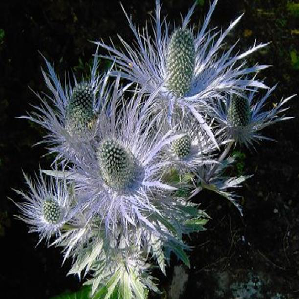

In [30]:
img

## Using pre-trained neural network

In [31]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [32]:
X = preprocess_input(X)
pred = model.predict(X)

1/1 [==============================] - 1s 919ms/step


In [33]:
decode_predictions(pred)

[[('n07730033', 'cardoon', 0.665376),
  ('n03991062', 'pot', 0.054304592),
  ('n01914609', 'sea_anemone', 0.04037478),
  ('n02319095', 'sea_urchin', 0.028044622),
  ('n11939491', 'daisy', 0.0275863)]]

## Training Xception with the image dataset.

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [35]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [36]:
train_ds = train_gen.flow_from_directory('./split/train', seed=42, target_size=(150, 150), batch_size=32, class_mode='categorical')
val_ds = val_gen.flow_from_directory('./split/val', seed=42, target_size=(150, 150), batch_size=32, shuffle=False, class_mode='categorical')


Found 4874 images belonging to 102 classes.
Found 1602 images belonging to 102 classes.


In [37]:
train_ds.class_indices

{'alpine_sea_holly': 0,
 'anthurium': 1,
 'artichoke': 2,
 'azalea': 3,
 'ball_moss': 4,
 'balloon_flower': 5,
 'barbeton_daisy': 6,
 'bearded_iris': 7,
 'bee_balm': 8,
 'bird_of_paradise': 9,
 'bishop_of_llandaff': 10,
 'black-eyed_susan': 11,
 'blackberry_lily': 12,
 'blanket_flower': 13,
 'bolero_deep_blue': 14,
 'bougainvillea': 15,
 'bromelia': 16,
 'buttercup': 17,
 'californian_poppy': 18,
 'camellia': 19,
 'canna_lily': 20,
 'canterbury_bells': 21,
 'cape_flower': 22,
 'carnation': 23,
 'cautleya_spicata': 24,
 'clematis': 25,
 'colts_foot': 26,
 'columbine': 27,
 'common_dandelion': 28,
 'corn_poppy': 29,
 'cyclamen': 30,
 'daffodil': 31,
 'desert_rose': 32,
 'english_marigold': 33,
 'fire_lily': 34,
 'foxglove': 35,
 'frangipani': 36,
 'fritillary': 37,
 'garden_phlox': 38,
 'gaura': 39,
 'gazania': 40,
 'geranium': 41,
 'giant_white_arum_lily': 42,
 'globe-flower': 43,
 'globe_thistle': 44,
 'grape_hyacinth': 45,
 'great_masterwort': 46,
 'hard-leaved_pocket_orchid': 47,
 'h

In [41]:
base_model = Xception(weights='imagenet', input_shape=(150, 150, 3), include_top=False)

base_model.trainable=False

inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(102)(vectors)

model = keras.Model(inputs, outputs)

In [42]:
optimizer = keras.optimizers.Adam(learning_rate=0.01)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [43]:
info = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
153/153 [==============================] - 34s 207ms/step - loss: 2.7007 - accuracy: 0.5300 - val_loss: 1.7618 - val_accuracy: 0.6373
Epoch 2/10
153/153 [==============================] - 31s 200ms/step - loss: 0.8170 - accuracy: 0.8047 - val_loss: 1.5271 - val_accuracy: 0.7135
Epoch 3/10
153/153 [==============================] - 31s 200ms/step - loss: 0.4853 - accuracy: 0.8744 - val_loss: 1.8334 - val_accuracy: 0.6910
Epoch 4/10
153/153 [==============================] - 31s 201ms/step - loss: 0.3270 - accuracy: 0.9138 - val_loss: 1.6774 - val_accuracy: 0.7285
Epoch 5/10
153/153 [==============================] - 31s 201ms/step - loss: 0.1764 - accuracy: 0.9508 - val_loss: 1.6346 - val_accuracy: 0.7397
Epoch 6/10
153/153 [==============================] - 31s 201ms/step - loss: 0.1364 - accuracy: 0.9614 - val_loss: 1.9287 - val_accuracy: 0.7129
Epoch 7/10
153/153 [==============================] - 31s 200ms/step - loss: 0.1506 - accuracy: 0.9594 - val_loss: 1.8448 - val_ac

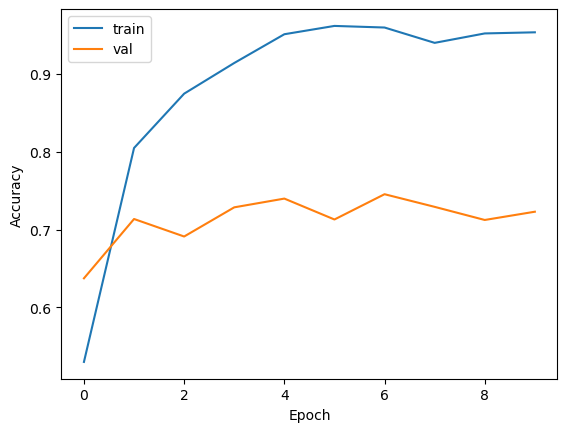

In [44]:
plt.plot(info.history['accuracy'], label='train')
plt.plot(info.history['val_accuracy'], label='val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

## Adjusting learning rate

In [45]:
def make_model(learning_rate=0.01):
	base_model = Xception(weights='imagenet', input_shape=(150, 150, 3), include_top=False)
	base_model.trainable=False
	inputs = keras.Input(shape=(150, 150, 3))
	base = base_model(inputs, training=False)
	vectors = keras.layers.GlobalAveragePooling2D()(base)
	outputs = keras.layers.Dense(102)(vectors)
	model = keras.Model(inputs, outputs)
	optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
	loss = keras.losses.CategoricalCrossentropy(from_logits=True)
	model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
	return model

In [46]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1, 1]:
	print(lr)
	model = make_model(learning_rate=lr)
	info = model.fit(train_ds, epochs=10, validation_data=val_ds)
	scores[lr] = info.history
	print()
	print()

0.0001
Epoch 1/10
153/153 [==============================] - 33s 205ms/step - loss: 4.1152 - accuracy: 0.1161 - val_loss: 3.5183 - val_accuracy: 0.2378
Epoch 2/10
153/153 [==============================] - 31s 201ms/step - loss: 3.1267 - accuracy: 0.3328 - val_loss: 2.8349 - val_accuracy: 0.4157
Epoch 3/10
153/153 [==============================] - 31s 201ms/step - loss: 2.5197 - accuracy: 0.4926 - val_loss: 2.4014 - val_accuracy: 0.5181
Epoch 4/10
153/153 [==============================] - 31s 201ms/step - loss: 2.1134 - accuracy: 0.5975 - val_loss: 2.1060 - val_accuracy: 0.5693
Epoch 5/10
153/153 [==============================] - 31s 201ms/step - loss: 1.8238 - accuracy: 0.6584 - val_loss: 1.8953 - val_accuracy: 0.6192
Epoch 6/10
153/153 [==============================] - 31s 201ms/step - loss: 1.6098 - accuracy: 0.7011 - val_loss: 1.7357 - val_accuracy: 0.6436
Epoch 7/10
153/153 [==============================] - 31s 201ms/step - loss: 1.4430 - accuracy: 0.7347 - val_loss: 1.6152 -

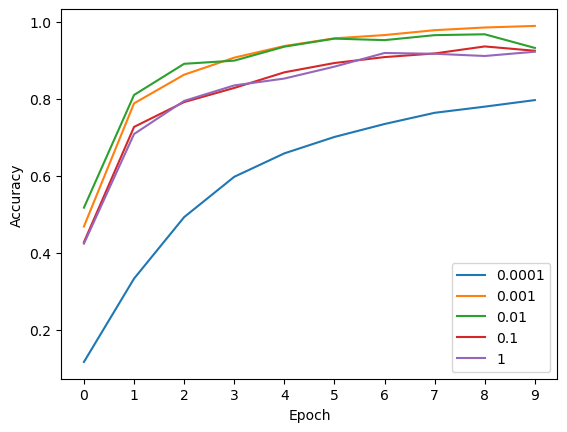

In [47]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=lr)
    #plt.plot(info.history['val_accuracy'], label='val')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
plt.xticks(np.arange(10))
plt.legend()

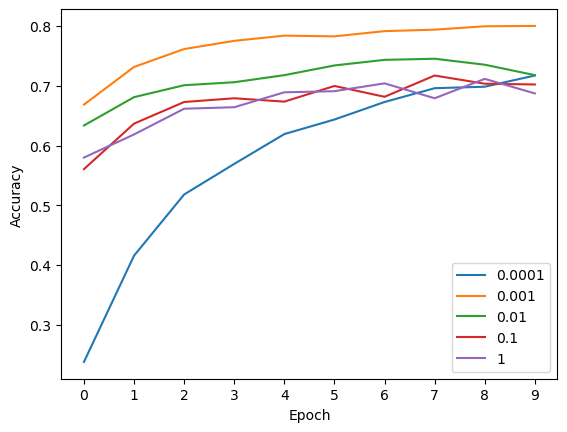

In [48]:
for lr, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=lr)
    #plt.plot(info.history['val_accuracy'], label='val')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
plt.xticks(np.arange(10))
plt.legend()

In [49]:
learning_rate = 0.001

## Checkpointing

In [50]:
checkpoint = keras.callbacks.ModelCheckpoint('xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
                                save_best_only=True,
                                monitor='val_accuracy',
                                mode='max')

In [51]:
model = make_model(learning_rate=learning_rate)
info = model.fit(train_ds, epochs=15, validation_data=val_ds, callbacks=[checkpoint])

Epoch 1/15
153/153 [==============================] - 34s 207ms/step - loss: 2.3838 - accuracy: 0.4711 - val_loss: 1.4280 - val_accuracy: 0.6623
Epoch 2/15
153/153 [==============================] - 31s 202ms/step - loss: 0.9641 - accuracy: 0.7850 - val_loss: 1.0978 - val_accuracy: 0.7353
Epoch 3/15
153/153 [==============================] - 31s 203ms/step - loss: 0.6389 - accuracy: 0.8660 - val_loss: 0.9820 - val_accuracy: 0.7559
Epoch 4/15
153/153 [==============================] - 31s 202ms/step - loss: 0.4688 - accuracy: 0.9093 - val_loss: 0.9096 - val_accuracy: 0.7665
Epoch 5/15
153/153 [==============================] - 31s 203ms/step - loss: 0.3569 - accuracy: 0.9376 - val_loss: 0.8588 - val_accuracy: 0.7821
Epoch 6/15
153/153 [==============================] - 31s 203ms/step - loss: 0.2814 - accuracy: 0.9563 - val_loss: 0.8289 - val_accuracy: 0.7915
Epoch 7/15
153/153 [==============================] - 31s 203ms/step - loss: 0.2268 - accuracy: 0.9707 - val_loss: 0.7975 - val_ac

## Adding more layers

In [56]:
def make_model(learning_rate=0.01, size_inner=100):
        base_model = Xception(weights='imagenet', input_shape=(150, 150, 3), include_top=False)
        base_model.trainable=False
        inputs = keras.Input(shape=(150, 150, 3))
        base = base_model(inputs, training=False)
        vectors = keras.layers.GlobalAveragePooling2D()(base)
        inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
        outputs = keras.layers.Dense(102)(inner)
        model = keras.Model(inputs, outputs)
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
        loss = keras.losses.CategoricalCrossentropy(from_logits=True)
        model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
        return model

In [57]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
	print(size)
	model = make_model(learning_rate=learning_rate, size_inner=size)
	info = model.fit(train_ds, epochs=15, validation_data=val_ds)
	scores[size] = info.history
	print()
	print()

10
Epoch 1/15
153/153 [==============================] - 34s 206ms/step - loss: 4.3111 - accuracy: 0.0759 - val_loss: 3.8659 - val_accuracy: 0.1511
Epoch 2/15
153/153 [==============================] - 31s 200ms/step - loss: 3.4065 - accuracy: 0.2154 - val_loss: 3.0366 - val_accuracy: 0.2884
Epoch 3/15
153/153 [==============================] - 31s 200ms/step - loss: 2.6390 - accuracy: 0.3670 - val_loss: 2.4645 - val_accuracy: 0.4051
Epoch 4/15
153/153 [==============================] - 31s 201ms/step - loss: 2.1966 - accuracy: 0.4534 - val_loss: 2.2267 - val_accuracy: 0.4526
Epoch 5/15
153/153 [==============================] - 31s 201ms/step - loss: 1.9518 - accuracy: 0.4951 - val_loss: 2.0700 - val_accuracy: 0.4794
Epoch 6/15
153/153 [==============================] - 31s 201ms/step - loss: 1.7837 - accuracy: 0.5324 - val_loss: 1.9509 - val_accuracy: 0.5012
Epoch 7/15
153/153 [==============================] - 31s 201ms/step - loss: 1.6609 - accuracy: 0.5558 - val_loss: 1.8632 - val

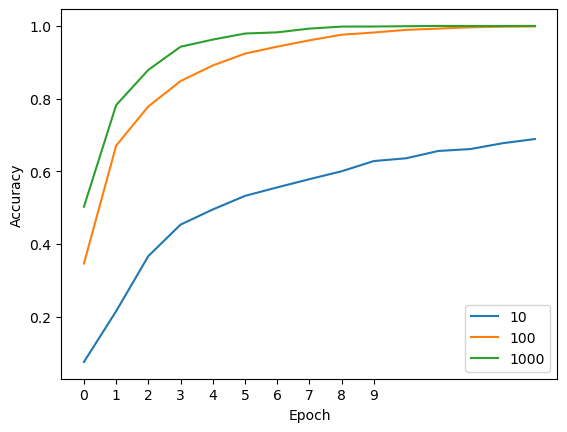

In [58]:
for size, hist in scores.items():
    plt.plot(hist['accuracy'], label=size)
    #plt.plot(info.history['val_accuracy'], label='val')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
plt.xticks(np.arange(10))
plt.legend()

In [ ]:
size = 1000

## Dropout and Regularisation

In [ ]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
        base_model = Xception(weights='imagenet', input_shape=(150, 150, 3), include_top=False)
        base_model.trainable=False
        inputs = keras.Input(shape=(150, 150, 3))
        base = base_model(inputs, training=False)
        vectors = keras.layers.GlobalAveragePooling2D()(base)
        inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
        drop = keras.layers.Dropout(droprate)(inner)
        outputs = keras.layers.Dense(102)(drop)
        model = keras.Model(inputs, outputs)
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
        loss = keras.losses.CategoricalCrossentropy(from_logits=True)
        model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
        return model

In [ ]:
learning_rate = 0.001
size = 1000

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
	print(droprate)
	model = make_model(learning_rate=learning_rate, size_inner=size, droprate=droprate)
	info = model.fit(train_ds, epochs=40, validation_data=val_ds)
	scores[droprate] = info.history
	print()
	print()